Question 1

In [ ]:
import numpy as np
from numpy import genfromtxt

x = genfromtxt('problem_1_data.csv', delimiter=',')
x = np.reshape(x, (len(x), 1))

y = genfromtxt('problem_1_label.csv', delimiter=',')
y = np.reshape(y, (len(y), 1))


In [24]:
# Closed form solution
phi = np.hstack((x**2, x, np.ones((len(x), 1))))

w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)
print(f'Solution for a: {w[0]}')
print(f'Solution for b: {w[1]}')
print(f'Solution for c: {w[2]}')

Solution for a: [1.06623954]
Solution for b: [-0.58165109]
Solution for c: [4.01338366]


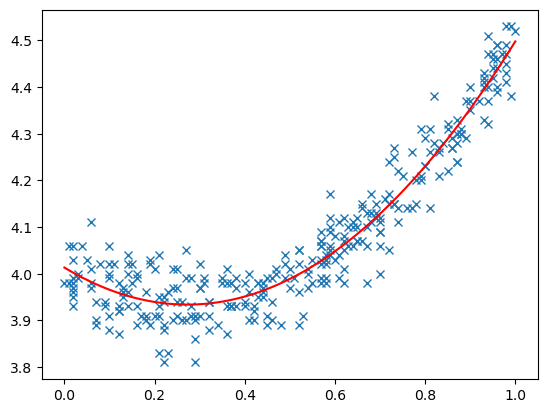

In [43]:
# Plot
import matplotlib.pyplot as plt

x_line = np.linspace(0, 1, 100)
y_line = w[0].item()*(x_line**2) + w[1].item()*x_line + w[2].item() 

plt.plot(x, y, 'x')
plt.plot(x_line, y_line, color='red')


plt.show()